# Machine Learning Project to Compare Learning Methods

*by Alex Laswell and Damian Armijo, May 9, 2018*

## Introduction

Initially we had chosen to simply code a game of snake in python that uses the Q Reinforcement Method described in class and the final programming assignment. However, in researching reinforcement learning methods and the Q method in particular, it became apparent that this horse has been beat to death.

Instead, we chose to take some of the better models that we found and preform an analysis of which method preformed the best out of the following three:

#### An Artificial Neural Network

Artificial neural networks (ANNs) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. Such systems "learn" (i.e. progressively improve performance on) tasks by considering examples, generally without task-specific programming ... An ANN is based on a collection of connected units or nodes called artificial neurons (a simplified version of biological neurons in an animal brain). Each connection (a simplified version of a synapse) between artificial neurons can transmit a signal from one to another. The artificial neuron that receives the signal can process it and then signal artificial neurons connected to it.

Below is an image used in class that shows a simple node for reccurent learning. It shows how you use incommin data as well as some of the data gathered from training as weights to help the node "learn." You can use multiple nodes concurrently and in a row to create a network which reinforces itself, and eventually will "learn."
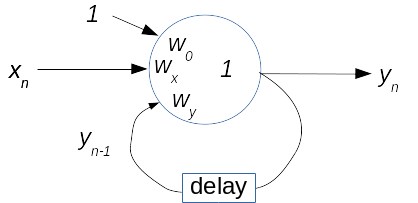
ANN's are meant to mimick what we think human brains do, they take in sensory information and reinforce what they learn from this they progress their knowledge and can make better descisions. This is the same thing that a neural network would do, the only potential difference is the inputs for data. They neural networks will also use a hdden layer, which produces the best results to train the network to be more accurate.

#### Deep Reinforcement Learning (DQN)

The DeepMind system used a deep convolutional neural network, with layers of tiled convolutional filters to mimic the effects of receptive fields. Reinforcement learning is unstable or divergent when a nonlinear function approximator such as a neural network is used to represent Q. This instability comes from the correlations present in the sequence of observations, the fact that small updates to Q may significantly change the policy and the data distribution, and the correlations between Q and the target values.

The Q function is meant to predict the sum of reinforcements in the future. It should try and minimize or maximize the sum and figure which action is most probable to lead to the desired goal. The following equation has the Q function with state s_t and action a_t and it should work to approximate the sum of reinforcements.

$$
    \begin{align*}
      Q(s_t,a_t) \approx \sum_{k=0}^\infty r_{t+k+1}
    \end{align*}
$$

Q functions learn from changes to the actions, the state, and the reinforcement that occurs. There is a tendency for Q functions with neural networks to over blow certain action values, one way to curb this is to double down and do two-part Q-learning. We did not find if the DeepMind system used in the things we observed use Double Q-learning, but it does seem that using this would help train the snake much better.


#### State-action-reward-state-action (SARSA)

State–action–reward–state–action (SARSA) is an algorithm for learning a Markov decision process policy, used in the reinforcement learning area of machine learning. It was proposed by Rummery and Niranjan in a technical note with the name "Modified Connectionist Q-Learning" (MCQ-L). The alternative name Sarsa, proposed by Rich Sutton, was only mentioned as a footnote.

This name simply reflects the fact that the main function for updating the Q-value depends on the current state of the agent "S1", the action the agent chooses "A1", the reward "R" the agent gets for choosing this action, the state "S2" that the agent enters after taking that action, and finally the next action "A2" the agent choose in its new state. The acronym for the quintuple (st, at, rt, st+1, at+1) is SARSA. This means that what is changing is the agents knowledge, rather than the environment telling it if there is good or bad options. The agent holds what it learns as good and bad in itself from repeated training. 

## Methods

The following are links to code repositories / concepts were utilized for testing and analysis. 

* [Neural Network by Slava Korolev](https://towardsdatascience.com/today-im-going-to-talk-about-a-small-practical-example-of-using-neural-networks-training-one-to-6b2cbd6efdb3)
* [DQN by Yuriy Guts](https://github.com/YuriyGuts/snake-ai-reinforcement)
* [SARSA by Pranesh Srinivasan](http://spranesh.github.io/rl-snake/)

## Neural Network
The first implementation we observed with snake, and just a Neural Network to train the snake. They gathered information for the snake initially via randomly generating movement. They then used that data "5504 training examples" to teach the snake to survive. After teaching the snake to not run into walls, they began to train it to move it's direction toward the apple. They would have it move either forward (0), left(-1), or right (1). They would then let the network iterate, and used a hidden layer. They also kept track of whether or not the snake lived or died, and if it turned in the "wrong" direction. They were able to on average reach a score of 12.171. After this they did the same process but instead with 100000 games, and the average score was much better, 25.33.

This is the picture they gave for the structure of the neural network with a hidden layer of 25 nodes or neurons 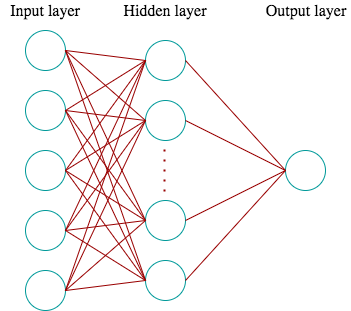


We ran the code given, and where able to find some similar results, and found that just using tesorflow's neural network the snake was able to be trained effectively. It also seemed that the more training the more effective the snake was at getting the apple. 


## DQN


After looking at a neural network implementation we looked into Deep Q-learning implementation. The repository which used DQN to train an ai to play snake is linked in the above section. There is simple steps that they took to train with Q-learning. 
### Steps:

1.) Explore: take a random action.

2.) Exploit: take the best known action for this state.

3.) Remember a new piece of experience.

4.) Sample a random batch from experience.

5.) Learn on the batch.

6.) Repeat the proccess.

Following these steps they are able to train the ai to go towards the goal. They were also able to change many things. Along with these steps they were also able to adjust multiple inputs to create a more accurate DQN.

### Inputs:

    env:
        an instance of Snake environment.
        
    num_episodes (int):
        the number of episodes to run during the training.
        
    batch_size (int):
        the size of the learning sample for experience replay.
        
    discount_factor (float):
        discount factor (gamma) for computing the value function.
        
    checkpoint_freq (int):
        the number of episodes after which a new model checkpoint will be created.
        
    exploration_range (tuple):
        a (max, min) range specifying how the exploration rate should decay over time. 
        
    exploration_phase_size (float):
        the percentage of the training process at which
        the exploration rate should reach its minimum.
        
They were able to compile some results. For a model that was trained on 60,000 episodes the mean total points were 19.2, with a standard deviation of 4.6 points.

## SARSA

SARSA in conjunction with Q-learning is the final machine learning algorithm that we investigated. This one used Q-learning, but it used it via SARSA. What is different about this is that the agent learns from what it does, and that it changes the world based on it's own perspective. This is different than finding the optimal Q-value which is found through exploration and exploitation. Escentially the difference is in that the agent finds it's own Q-value based on it's learning, rather than "being given" via the environment the optimal Q-value.

### Rewards or Discount factor
They gave the snake 3 things that will influence it's later actions. 
* Getting food is good. +500 points to the snake.
* Hitting a wall or itself is bad. -100 reward to it.
* Anything else is also (relatively) bad. We want to get to the food quickly. (-10 to the snake for every move where none of the above happens).


We both worked on this together every step of the way; researching which methods and code repositories we wanted to evalutate, running the code in the testing environment, compiling the data, and writting up our findings. We meet at least once each week, sometimes twice, and really just treated this as a team project. 

## Results

Artificial neural networks (ANNs) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. Such systems "learn" (i.e. progressively improve performance on) tasks by considering examples, generally without task-specific programming.

In our testing, we found that SARSA peformed better than either of the other methods. However it does take a lot more time to  train than either of the other methods.  

Additionally, DQN does better than the simple nerual network, which was consistant with our expectations. However, we both were pretty confident that this was going to be the best method, and our findings proved otherwise. When the training time was shortened, both Q-Learning and SARSA preformed about the same, with Q-Learning even out preforming the SARSA sometimes, but this is only if the training time is very short (like 20-25 minutes), anything after that and SARSA takes over. 

All of the algorithms did show learning even with just a handfull of iterations, 2-3  minutes of training or about one hundred games. Which again was consistent with our expectations. 

## Conclusions

There are many things that were learned from exploring snake and machine learning. One of them is that there are many different ways of "teaching" the AI what to do. It can be done simply through the use of a neural network that reinforces itself and makes use of hidden layers within the network. Another very effective way is through the use of Q-learning, and Q-learning with SARSA. They all seem to be reasonably effective at training the snake to eat a dot, but some require longer learning times, namely SARSA (mostly due to the fact that it must teach itself without the influence of the board.). Another thing that we learned is that there are many different activation functions that can be used to get the same results, and potentially better ones. In the DQN implementation they made use of both relu and linear functions to try and get a more wel-rounded network. 

One project specific thing that we learned with regards to our own project is that there might not be a need to repeat with the specific example of snake and Q-leanring. It has been done, and has been done in many ways, and we thought rather than try and adjust the code from class, we would investigate some other ways in which people have used machine learning with the game of snake. We had to actually scrap some of what we had done initially. We had actually made a simple but playable game of snake, and when we realized there was already stuff done about Q-learning we thought it better to use what other, more accomplished teams had done and compare and contrast the differences. This had us adjust our timeline, and made us do more research than we had initially intended, but it was still very interesting and engaging. 

There is still a lot to be talked about with all of these different implementations, and with the others that we found, but unfortunately we were pressed for time and couldn't do an effective job at comparing everything that is out there. We did learn a lot about the practicality of what we learned in class, and how that can be applied to things we are interested in, namely video games. It is also interesting to see that it is possible to relatively quickly train a very simple ai to control a character in a game, and how this can be extrapolated to creating an ai that can learn from very complex situations, and can be given a goal to achieve in these complex situations. We enjoyed doing the research for the project and have talked about continuing to do more experimentation when we have more time.

### References

* [Neural Network by Slava Korolev](https://towardsdatascience.com/today-im-going-to-talk-about-a-small-practical-example-of-using-neural-networks-training-one-to-6b2cbd6efdb3)
* [DQN by Yuriy Guts](https://github.com/YuriyGuts/snake-ai-reinforcement)
* [SARSA by Pranesh Srinivasan](http://spranesh.github.io/rl-snake/)
* [Wikipedia](https://en.wikipedia.org/wiki/)
* [Double Q-learning](https://arxiv.org/pdf/1509.06461.pdf)

In [10]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Project Report Example.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

IndexError: list index out of range